In [61]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Archivo "{name}" tamaño {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving circuit.tif to circuit.tif
Archivo "circuit.tif" tamaño 61753 bytes


In [90]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv.imread('circuit.tif', 0)	
#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img, -1, kernelx)
img_prewitty = cv.filter2D(img, -1, kernely)
prewitt = img_prewittx + img_prewitty

img_sobel_x = cv.Sobel(img, cv.CV_8U, 1, 0, ksize=3)
img_sobel_y = cv.Sobel(img, cv.CV_8U, 0, 1, ksize=3)
sobel = img_sobel_x + img_sobel_y

canny = cv.Canny(img, threshold1 = 50, threshold2 =255)

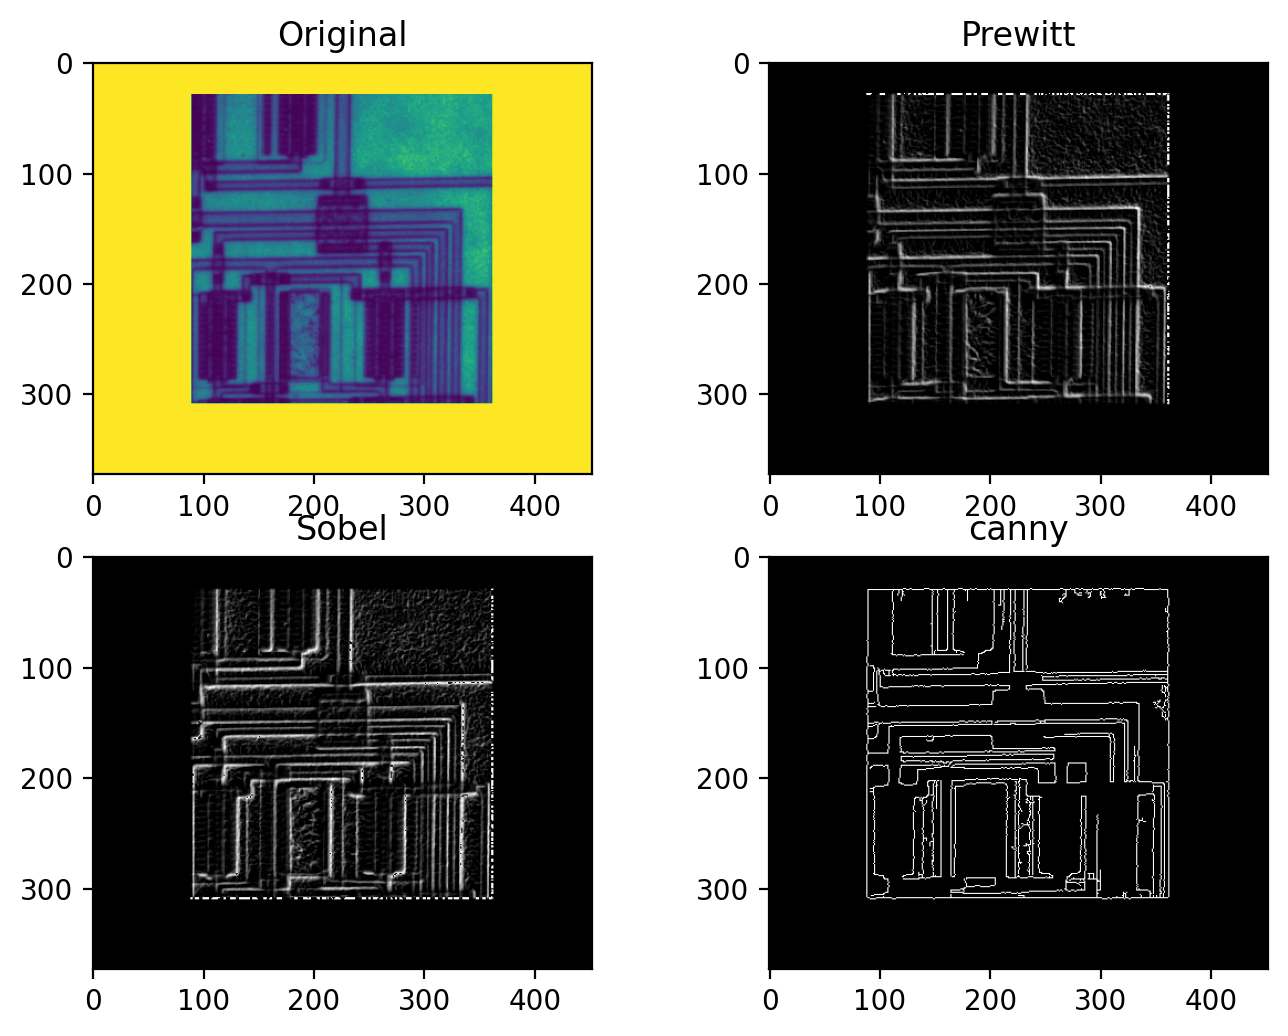

In [91]:
figure(figsize=(8, 6), dpi=200)
plt.subplot(2,2,1),plt.imshow(img), 
plt.title('Original'),
plt.subplot(2,2,2),plt.imshow(prewitt, cmap = 'gray' )
plt.title('Prewitt')
plt.subplot(2,2,3),plt.imshow(sobel, cmap = 'gray')
plt.title('Sobel')
plt.subplot(2,2,4),plt.imshow(canny, cmap = 'gray')
plt.title('canny')
plt.show()